In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv('/content/UberDataset.csv',encoding='Latin-1')

In [5]:
data.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
data.isnull().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,503


In [7]:
data.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [8]:
data.dtypes


,0
START_DATE,object
END_DATE,object
CATEGORY,object
START,object
STOP,object
MILES,float64
PURPOSE,object


In [9]:
data.shape

(1156, 7)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [11]:
data.duplicated().sum()

1

In [12]:
duplicates = data[data.duplicated()]
print(duplicates)


          START_DATE         END_DATE  CATEGORY   START  STOP  MILES  PURPOSE
492  6/28/2016 23:34  6/28/2016 23:59  Business  Durham  Cary    9.9  Meeting


In [13]:
# DATA PREPROCESSING

In [14]:
data['PURPOSE'].fillna('NOT',inplace=True)

<ipython-input-14-83a9580a3633>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PURPOSE'].fillna('NOT',inplace=True)


In [15]:
data.isnull().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,0


In [16]:
data.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT


In [17]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'],errors='coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'],errors='coerce')

In [18]:
data.dtypes

,0
START_DATE,datetime64[ns]
END_DATE,datetime64[ns]
CATEGORY,object
START,object
STOP,object
MILES,float64
PURPOSE,object


In [ ]:
# we will add new column (DATE AND TIME)

In [19]:
from datetime import datetime

data['Date'] = pd.DatetimeIndex(data['START_DATE']).date

In [20]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06


In [21]:
data['Time'] = pd.DatetimeIndex(data['START_DATE']).hour

In [22]:
data.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0


In [ ]:
# DIVIDE THE CATEGORY AS PER TIME (MORNING , EVENING , AFTERNOON, NIGHT)

In [23]:
data['Day_Night_Category'] = pd.cut(x=data['Time'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [24]:
data.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day_Night_Category
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [25]:
data.dropna(inplace=True)


In [26]:
data.shape

(413, 10)

In [ ]:
#DATA VISUALISATION

In [ ]:
# In which category the people book the most Uber Ride

In [27]:
Category_Ride = data.groupby('CATEGORY').count().reset_index()
Category_Ride

,CATEGORY,START_DATE,END_DATE,START,STOP,MILES,PURPOSE,Date,Time,Day_Night_Category
0,Business,400,400,400,400,400,400,400,400,400
1,Personal,13,13,13,13,13,13,13,13,13


<Axes: xlabel='count', ylabel='CATEGORY'>

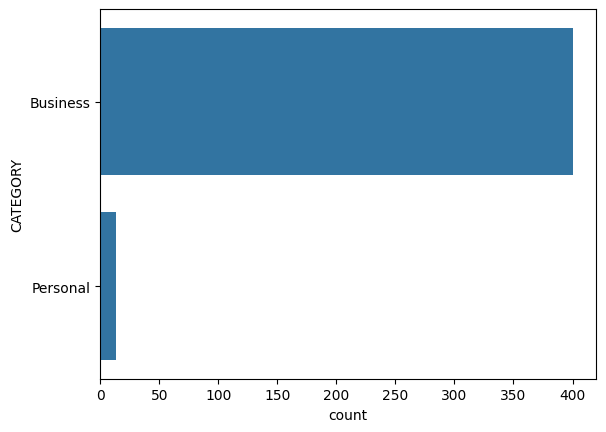

In [28]:
Category_Ride = data.groupby('CATEGORY').count().reset_index()
sns.countplot(data['CATEGORY'])


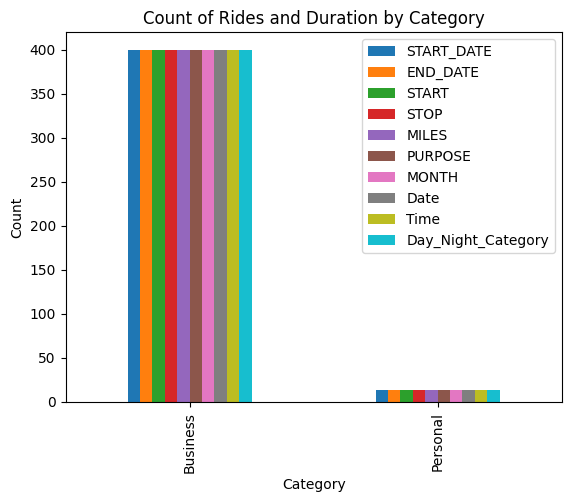

In [ ]:
Category_Ride = data.groupby('CATEGORY').count().reset_index()
Category_Ride.plot(kind='bar',x='CATEGORY')
plt.title('Count of Rides and Duration by Category')
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()


In [ ]:
# For which purpose people book Uber Ride the Most?

<Axes: xlabel='count', ylabel='PURPOSE'>

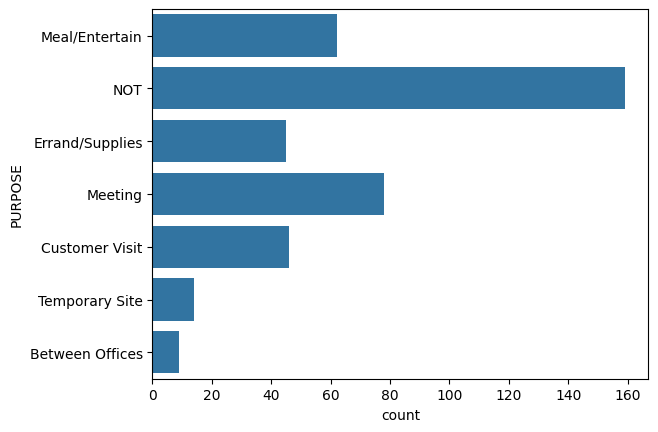

In [ ]:
sns.countplot(data['PURPOSE'])

In [ ]:
Category_Purpose = data.groupby('PURPOSE').size().reset_index(name='Count')
Category_Purpose

,PURPOSE,Count
0,Between Offices,9
1,Customer Visit,46
2,Errand/Supplies,45
3,Meal/Entertain,62
4,Meeting,78
5,NOT,159
6,Temporary Site,14


In [ ]:
# At what time do people book Uber the Most?

<Axes: xlabel='count', ylabel='Day_Night_Category'>

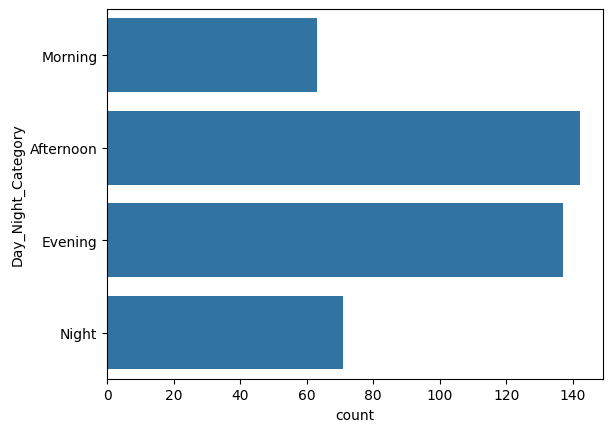

In [ ]:
sns.countplot(data['Day_Night_Category'])

In [ ]:
# In which month do people book Uber less Frequently

In [ ]:
data['MONTH'] = pd.DatetimeIndex(data['START_DATE']).month

date_label = {
    1.0: 'January',
    2.0: 'February',
    3.0: 'March',
    4.0: 'April',
    5.0: 'May',
    6.0: 'June',
    7.0: 'July',
    8.0: 'August',
    9.0: 'September',
    10.0: 'October',
    11.0: 'November',
    12.0: 'December'
}
data['MONTH'] = data.MONTH.map(date_label)
mon=data.MONTH.value_counts(sort=False)


In [ ]:
data.tail(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MONTH,Date,Time,Day_Night_Category
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,December,2016-12-12,14,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,December,2016-12-12,17,Evening
1047,2016-12-12 20:48:00,2016-12-12 20:57:00,Business,Morrisville,Cary,3.0,Customer Visit,December,2016-12-12,20,Night


In [ ]:
month_count=data.groupby('MONTH').size().reset_index(name='Count')
month_count=month_count.sort_values(by='MONTH', ascending=True)

month_count

,MONTH,Count
0,April,24
1,August,43
2,December,39
3,February,40
4,January,23
5,July,34
6,June,42
7,March,42
8,May,26
9,November,63


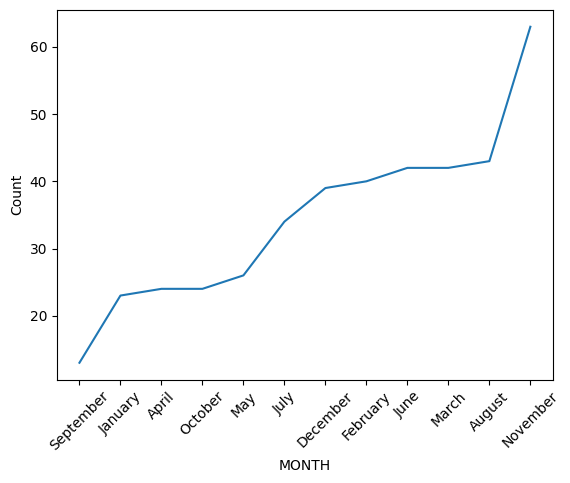

In [ ]:
sns.lineplot(data=month_count,x='MONTH',y='Count')

plt.show()

In [30]:
data['WEEK'] = data.START_DATE.dt.weekday

data_label = {0:'MONDAY', 1:'TUESDAY',2:'WEDNESDAY',3:'THURSDAY',4:'FRIDAY',5:'SATURDAY',6:'SUNDAY'}

data['WEEK'] = data['WEEK'].map(data_label)

In [33]:
data.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day_Night_Category,WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,FRIDAY
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,SATURDAY


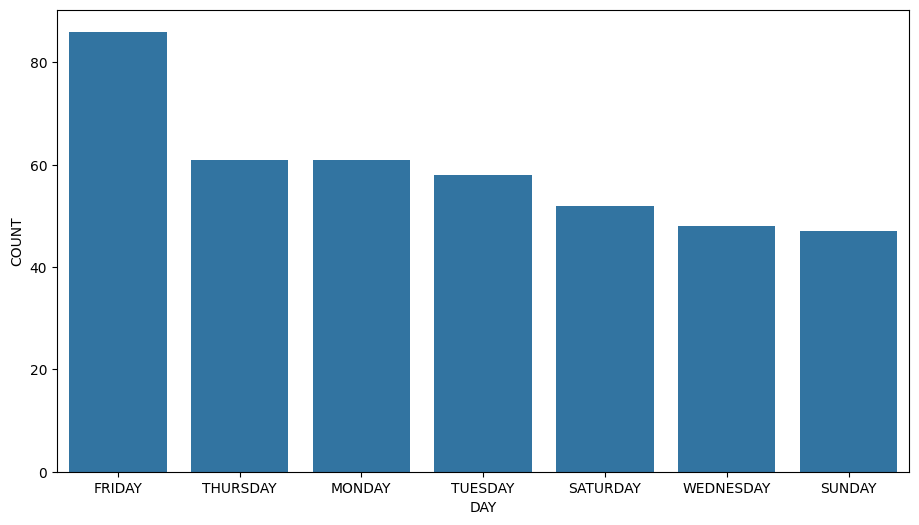

In [43]:
day_count = data.WEEK.value_counts()
plt.figure(figsize=(11, 6))
sns.barplot(x=day_count.index,y=day_count)
plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.show()

In [44]:
# How many miles do people book Uber Generally

<Axes: ylabel='MILES'>

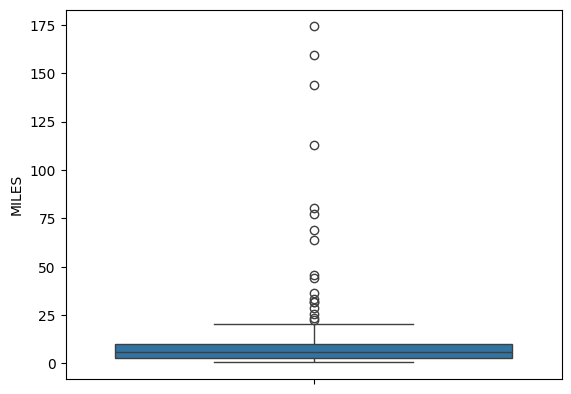

In [46]:
sns.boxplot(data['MILES'])

<Axes: ylabel='MILES'>

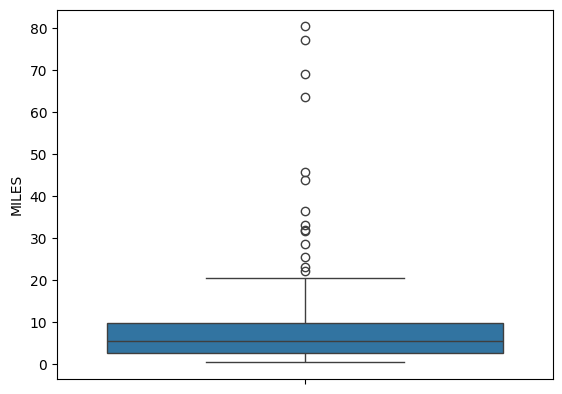

In [50]:
sns.boxplot(data[data['MILES']<100]['MILES'])